## Problem Statement

The problem we would try to solve is to use machine learning to create a model that predicts whether a passenger survived or not during the Titanic shipwreck. That is, we aim to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc). We would follow this ML workflow:

**Define the problem ---> Data gathering and understanding --> Data preprocessing and EDA --> Build model --> Evaluate model --> Make submission**

## Import libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# from pandas_profiling import ProfileReport
%matplotlib inline
sns.set()

## Data gathering and Understanding

In [3]:
# read in train, test, sample submission data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sub = pd.read_csv('gender_submission.csv')

In [4]:
# check first 5 observations in the train data
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# check first 5 observations in the test data
test.head() 

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
# check first 5 observations in the sample submission data
sub.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [7]:
# check test and train shape
print(test.shape, train.shape)

(418, 11) (891, 12)


Check info on train and test set features.

In [67]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [68]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


Check statistics on train and test set features.

In [113]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [114]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


## Data Preprocessing and quick EDA 

Now that we have checked basic information on the datasets provided, and we understand each feature in the dataset, we move into preprocessing the data for it to be passed into a ML model, and do quick EDA.

In [115]:
# check the percentage of each category in the target variable
train['Survived'].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

C:\Users\P\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


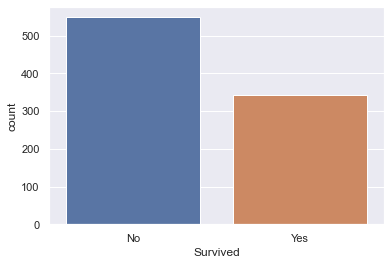

In [122]:
# countplot of each category in the target variable
sns.countplot(train['Survived'].map({0: 'No', 1: 'Yes'}));

We notice that a lot more passengers did not survive the shipwreck compared to those that survived. This type of dataset is called an **imbalanced dataset**, models trained on this dataset would have poor predictive performance, specifically for the minority class, please read more about it [here](https://machinelearningmastery.com/what-is-imbalanced-classification/).

More EDAs can be done with this dataset, like checking relationships between variables, these insights would give more kowledge about the dataset. `pandas_profiling` would help too (if you can sort it out)

To suppress FutureWarning please run: 
``` import warnings
warnings.simplefilter(action='ignore') ```

For data preprocessing, we drop redundant columns, fill null values and encode categorical variables in the dataset. Any preprocessing done on the train dataset MUST be done on the test dataset, to make life easy for us, we concatenate the train and test dataset together, preprocess the concatenated data then get back the training and test dataset needed.

In [123]:
# concatenate train and test data, check 5 random observations
test['Survived'] = 'test'
data = pd.concat([train, test]).reset_index(drop=True)
data.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
955,956,test,1,"Ryerson, Master. John Borie",male,13.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
582,583,0,2,"Downton, Mr. William James",male,54.0,0,0,28403,26.0000,NaN,S
732,733,0,2,"Knight, Mr. Robert J",male,NaN,0,0,239855,0.0000,NaN,S
372,373,0,3,"Beavan, Mr. William Thomas",male,19.0,0,0,323951,8.0500,NaN,S
951,952,test,3,"Dika, Mr. Mirko",male,17.0,0,0,349232,7.8958,NaN,S


In [124]:
# data shape
data.shape

(1309, 12)

In [125]:
# drop redundant columns
data.drop(['Name','PassengerId','Ticket','Cabin'], axis=1, inplace=True)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [126]:
# check sum of null values for each feature 
data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         263
SibSp         0
Parch         0
Fare          1
Embarked      2
dtype: int64

Fill null values in numerical features with -999, you could try other values too and compare results when you fit a model on the dataset

In [127]:
cols = ['Age', 'Fare']
for col in cols:
    data[col].fillna(-999, inplace=True)
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

Fill missing values in the categorical variable with mode, as always you could try other values

In [128]:
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
data.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

No more missing values in the dataset. We now move to encoding, here I use label encoding, please try out both label and one-hot encoding for your task and compare results, *Nothing is cast in stone*

In [129]:
# label encode categorical features 
cols = ['Sex', 'Embarked']

for col in cols:
    data[col] = pd.factorize(data[col])[0]
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


## Build Model

After tackling preprocessing, we move to building a model. First we get back our train and test dataset from the concatenated data, then we split our taining data, for more intuition on why we split datasets before fitting a model please check [here](https://www.quora.com/In-machine-learning-what-s-the-purpose-of-splitting-data-up-into-test-sets-and-training-sets).

In [130]:
# get back to train and test set
train_df = data.loc[(data['Survived'] != 'test')].reset_index(drop = True)
test_df = data.loc[(data['Survived'] == 'test')].reset_index(drop = True)

In [131]:
print(train_df.shape, test_df.shape)

(891, 8) (418, 8)


Separate feature from target

In [132]:
X = train_df.drop(['Survived'], axis=1)
y = train_df['Survived']
# this solved the bug we had in class, y was an object before 
# which wont work we some models, so we change its type to int
y = y.astype('int') 

In [133]:
print(X.shape, y.shape)

(891, 7) (891,)


Split the training dataset

In [148]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

In [134]:
X_train, X_test, y_train,  y_test = train_test_split(X, y, test_size=0.2, random_state=12)

In [135]:
print(X_train.shape, y_train.shape)

(712, 7) (712,)


Initialize and fit model.

In [ ]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

## Evaluate Model

Notice that the result is a list containing the two different classes when we use `.predict(X_test)`, we use this because the metric we are interested in is the accuracy. For f1 score, we use `.predict(X_test)` too. Understanding the evaluation metric is important.

If the metric needed for your task is roc_auc_score, for that you would use `.predict_proba(X_test)[:,1]` since what we are interested in are probabilities that a passenger would belong to a particular class, I would implement it too. Check [here](https://stackoverflow.com/questions/61184906/difference-between-predict-vs-predict-proba-in-scikit-learn) to learn more about this.

In [137]:
predict = model.predict(X_test)
predict

array([0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1])

In [138]:
prob_predict = model.predict_proba(X_test)[:,1]
prob_predict

array([0.04      , 0.65      , 0.022     , 0.67      , 0.        ,
       0.04      , 0.64      , 0.65      , 0.18      , 0.13583333,
       0.14      , 0.18      , 0.025     , 0.56      , 0.84      ,
       0.16666667, 0.05166667, 0.51      , 0.07      , 0.        ,
       0.18      , 0.08      , 0.15      , 0.06      , 0.22      ,
       0.73      , 0.84      , 0.49      , 0.08      , 0.99      ,
       0.03      , 0.02      , 0.8335267 , 0.16      , 0.42      ,
       0.91      , 0.02      , 0.03      , 0.        , 0.41      ,
       0.        , 0.02      , 0.97      , 0.17      , 0.03      ,
       0.        , 0.97      , 0.01      , 0.01833333, 0.19      ,
       0.45      , 0.99      , 0.98      , 0.72      , 0.        ,
       0.        , 0.125     , 0.99      , 0.29      , 0.03      ,
       0.27      , 0.27      , 0.77      , 0.13      , 0.14      ,
       0.97      , 0.65333333, 0.22      , 0.05      , 0.19659524,
       0.17      , 0.01      , 0.10333333, 0.5       , 0.83352

Get accuracy and f1 score

In [140]:
accuracy = accuracy_score(y_test, predict)
accuracy

0.7653631284916201

In [146]:
f1 = f1_score(y_test, predict)
f1`

0.7083333333333334

In [149]:
auc_ = roc_auc_score(y_test, prob_predict)
auc_

0.8306962025316456

In [150]:
print('{} accuracy is: {:.4f}'.format(type(model).__name__, accuracy))
print('{} F1 score is: {:.4f}'.format(type(model).__name__, f1))
print('{} ROC AUC score is: {:.4f}'.format(type(model).__name__, auc_))

RandomForestClassifier accuracy is: 0.7654
RandomForestClassifier F1 score is: 0.7083
RandomForestClassifier ROC AUC score is: 0.8307


Please try out different classification models for your task, and compare results to determine which model works best. For different classification algorithms check [here](https://analyticsindiamag.com/7-types-classification-algorithms/)

## Make Submission

Since this is a Kaggle competition, we would need to submit a csv file which would contain predictions of our trained model on the test dataset given. For a video walkthrough check [here](https://bit.ly/AICities_walkthrough)

In [151]:
# first five observations of test dataset
test_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,test,3,0,34.5,0,0,7.8292,2
1,test,3,1,47.0,1,0,7.0000,0
2,test,2,0,62.0,0,0,9.6875,2
3,test,3,0,27.0,0,0,8.6625,0
4,test,3,1,22.0,1,1,12.2875,0


In [152]:
# drop survived column, we added it during concatenation
test_df.drop(['Survived'], axis=1, inplace=True)

In [153]:
# predict on test data
pred = model.predict(test_df)

Save predicted values in samplesubmission file, here we replace vlaues in survived column from sample submission data with predicted values on the test set

In [154]:
sub['Survived'] = pred
sub.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


Save the dataframe to a csv file. Running this cell would save `submission.csv` to your PC in the location where you have this notebook. This csv file would then be submitted to Kaggle to get a score

In [1]:
# make submission file 
sub.to_csv('submissions.csv', index = False)

NameError: name 'sub' is not defined